MAI 103: Análise de Risco  //  Prof. Eber  
Lista 03  //  Data: 03/07/2018  //  Entrega: 10/07/2018

<b>Luis Filipe Kopp</b>  
<b>Mauro Bastos</b>  
<b>Brenda Santos</b>  
<b>Ronilson Pinho</b>  

In [1]:
library(triangle)
set.seed(1)

Warning message:
"package 'triangle' was built under R version 3.3.3"

1) A frota de uma empresa de taxi é composta por 20 veículos. Cada uma deles consome (40,60,58) litros de gasolina por dia a um custo variável de (3.1,4.0,3.8) reais por litro. Crie 3 modelos de risco de custo para o gasto diário da empresa de taxi.  

1 - simulando gastos individuais para cada um dos 20 taxis da frota

[1] 3825.868

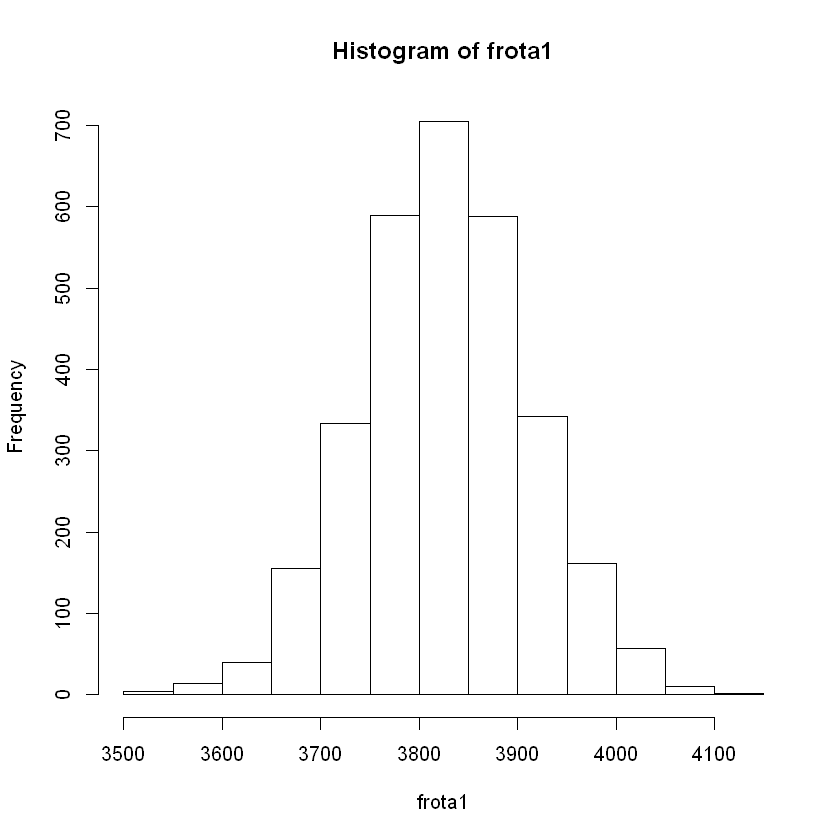

In [56]:
frota1 <- c()
for (i in 1:3000){
    litros <- rtriangle(20,40,60,58)
    preco <- rtriangle(20,3.1,4.0,3.8)
    frota1 <- c(frota1,sum(litros * preco))
}
mean(frota1)
hist(frota1)

2 - simulando o gasto diário de um táxi e usando o TCL

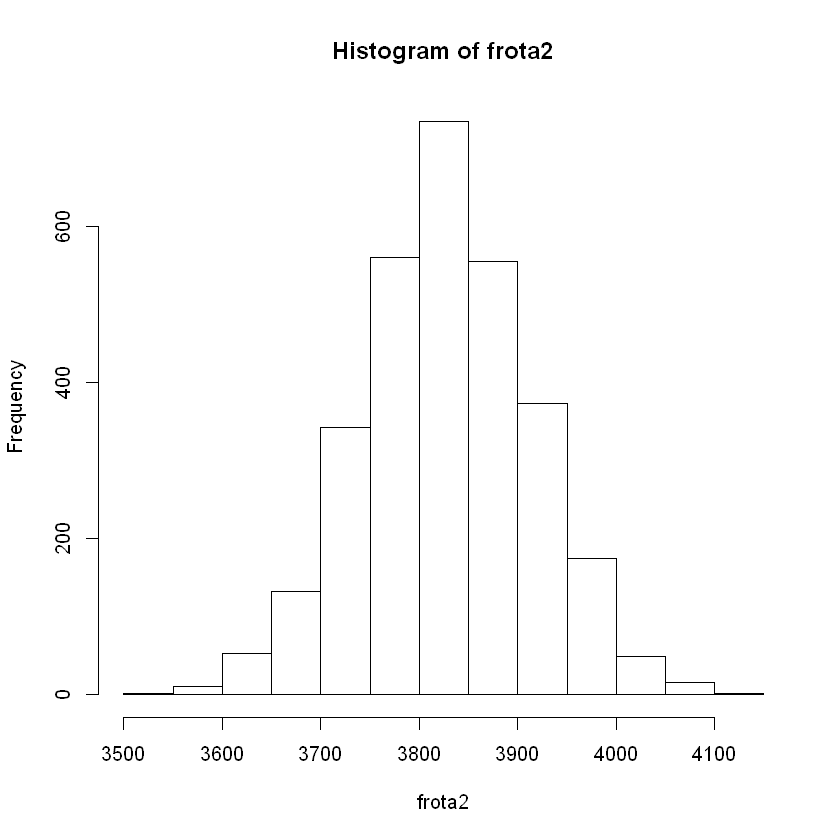

In [60]:
gasto <- c()
for (i in 1:1000){
    litros <- rtriangle(1,40,60,58)
    preco <- rtriangle(1,3.1,4.0,3.8)
    gasto <- c(gasto,mean(litros * preco))
}
m <- mean(20*gasto)
s <- sqrt(20*(sd(gasto))^2)
frota2 <- rnorm(3000,m,s)
hist(frota2)

3 - usando a fórmula aproximada para o produto de 2 VAs e aplicando o TCL

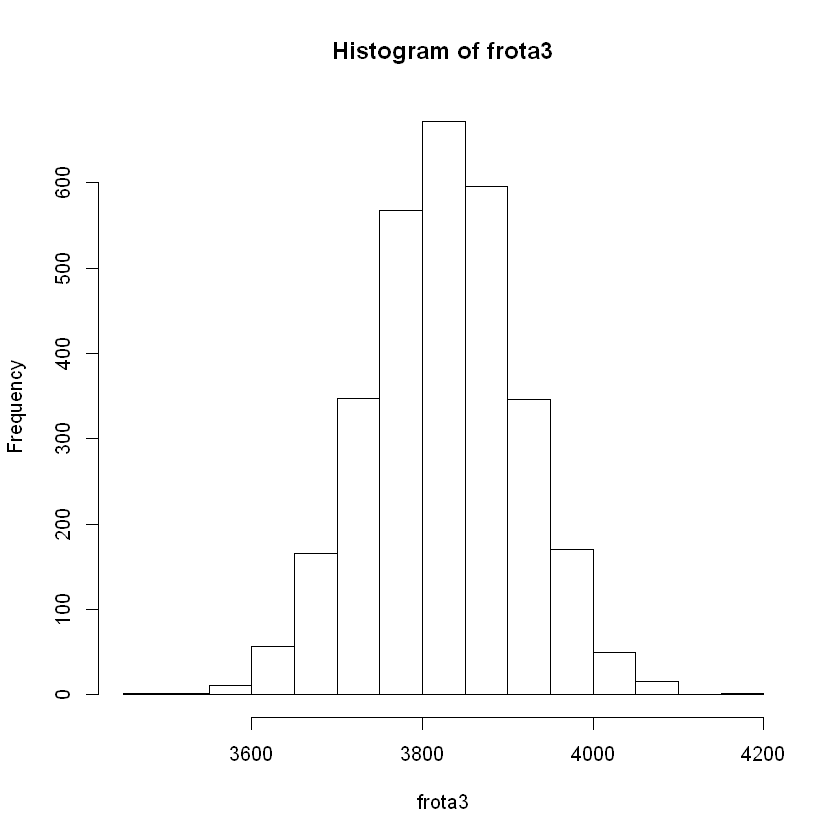

In [58]:
media <- c()
for (i in 1:1000){
    litros <- rtriangle(20,40,60,58)
    preco <- rtriangle(20,3.1,4.0,3.8)
    media <- c(media,sum(litros * preco))
}
m <- mean(media)
s <- sd(media)
frota3 <- rnorm(3000,m,s)
hist(frota3)

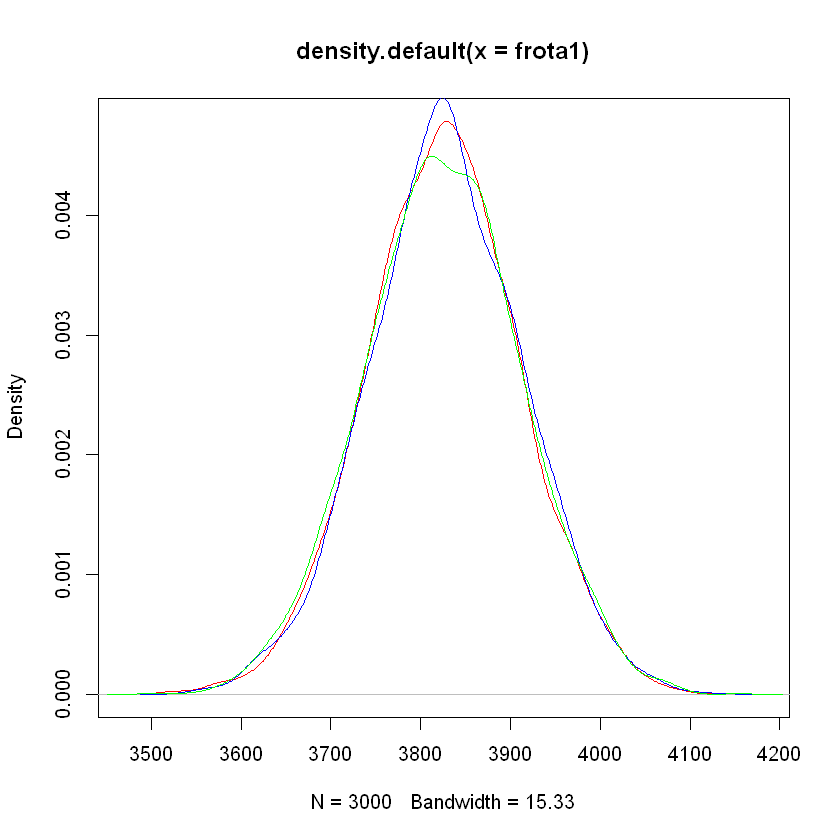

In [61]:
plot(density(frota1), col="red")
lines(density(frota2), col="blue")
lines(density(frota3), col="green")

4 - Compare e discuta os resultados encontrados. Use a função qqnorm para visualizar a comparação dos resultados.

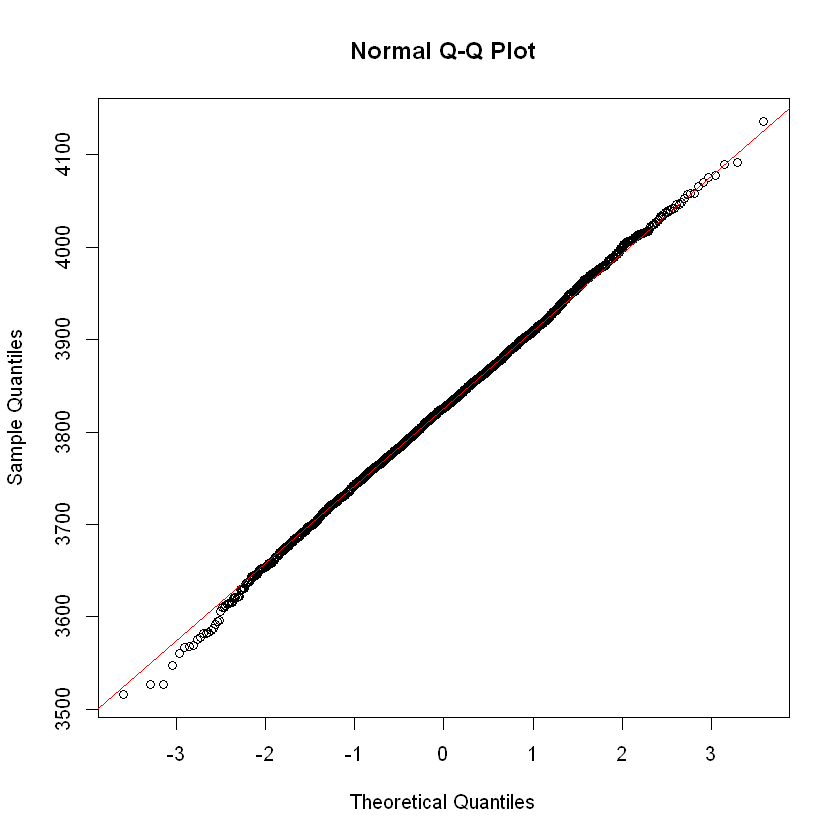

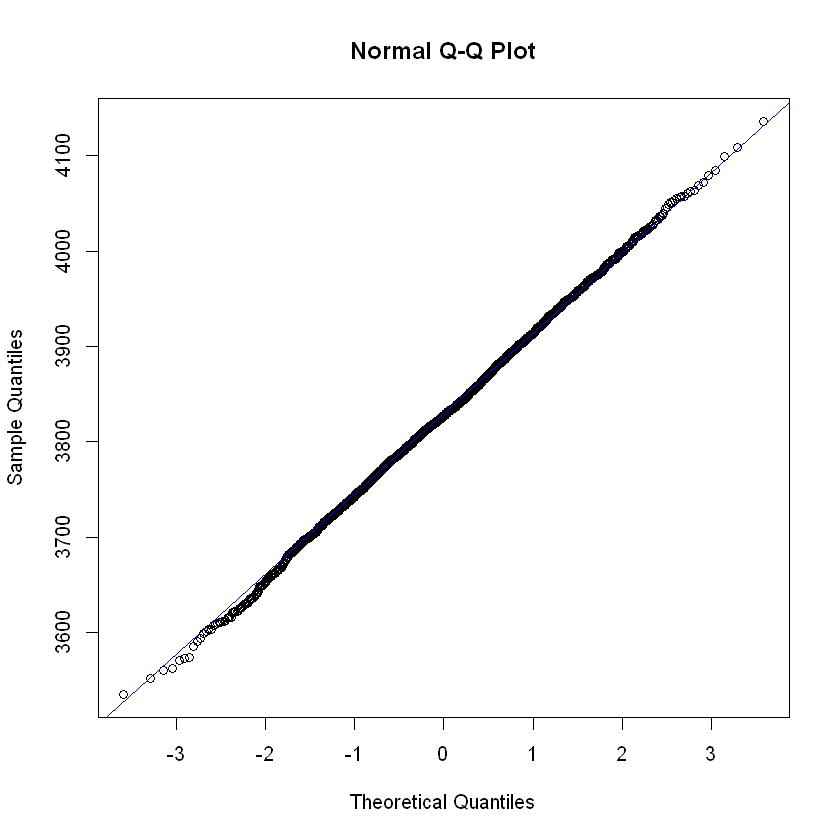

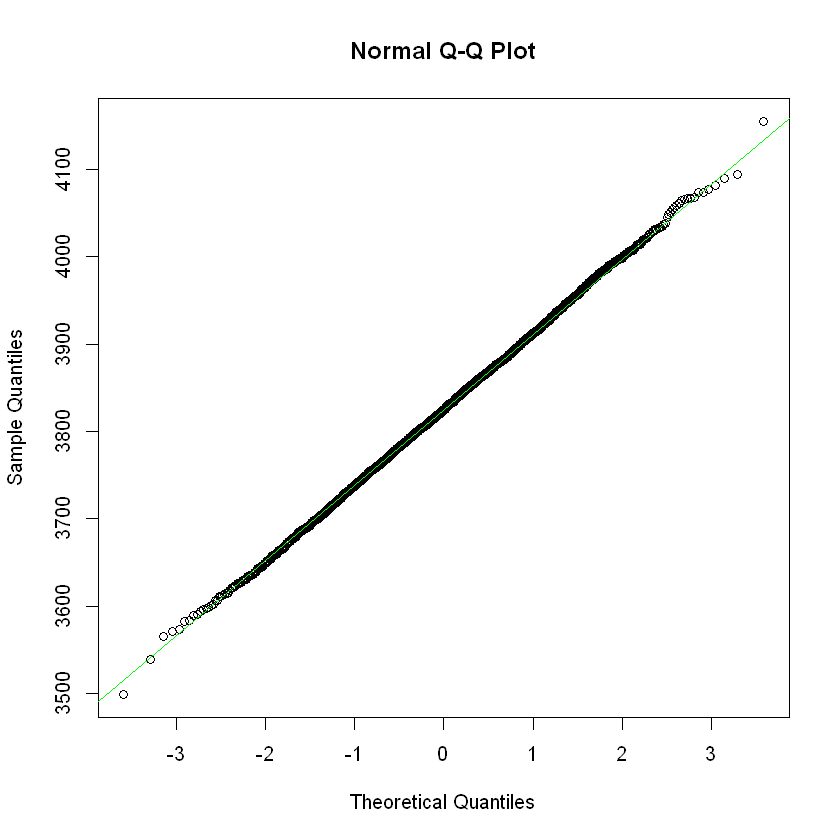

In [74]:
qqnorm(frota1)
qqline(frota1, col="red")
qqnorm(frota2)
qqline(frota2, col="blue")
qqnorm(frota3)
qqline(frota3, col="green")

2) Um casco de navio consiste de 562 placas metálicas que devem ser rebitadas. Estima-se que o tempo gasto por um rebitador seja dado pela triangle (3h45,5h30,4h15) por placa e que o rebitador recebe USD 7.50 por hora trabalhada.


1 - Qual o risco de custo de mão-obra de rebitagem?

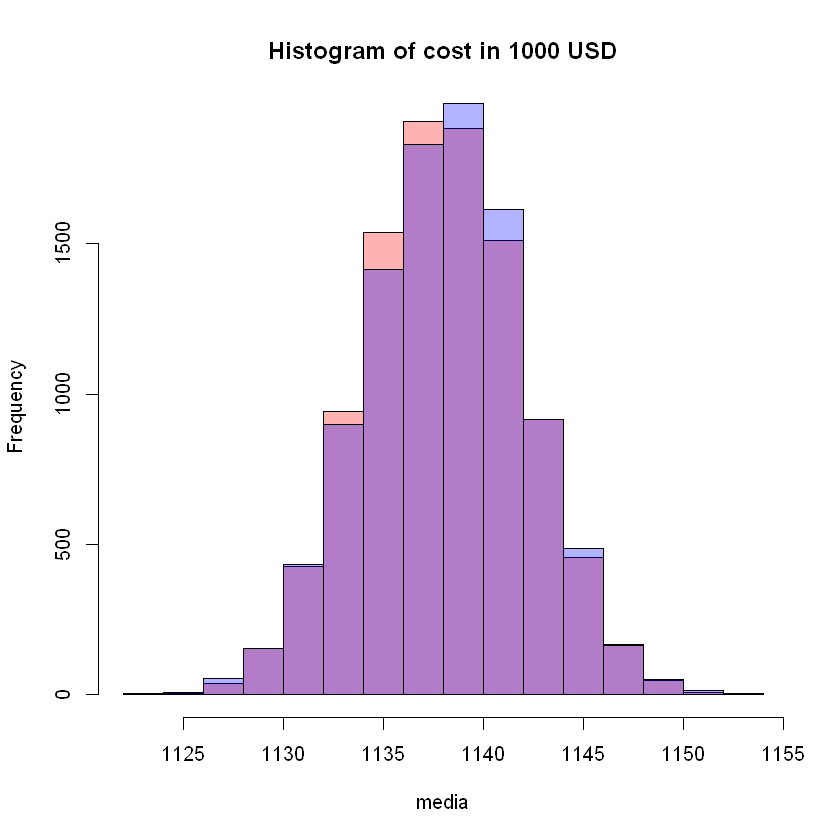

In [76]:
to_minutes <- function(h,m) h*60+m
media <- c()
for (i in 1:10000){
    tempo <- rtriangle(562,to_minutes(3,45),to_minutes(5,30),to_minutes(4,15))
    media <- c(media, sum(tempo)*7.5/1000)
}
m <- mean(media)
s <- sd(media)
media_n <- rnorm(10000,m,s)
hist(media, col=rgb(1,0,0,0.3), main="Histogram of cost in 1000 USD")
hist(media_n, col=rgb(0,0,1,0.3), add=T)

2 - Compare a distribuição cumulativa obtida usando a abordagem MC - força bruta com aquela obtida usando o TCL. Use a função qqnorm para visualizar a comparação dos resultados.

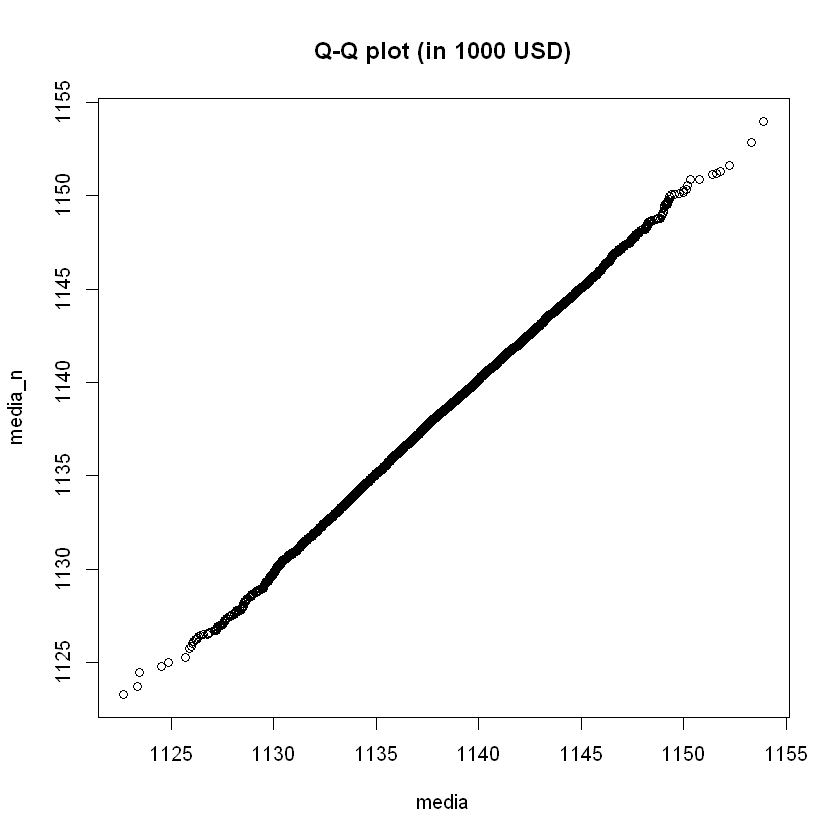

In [84]:
qqplot(media,media_n, main="Q-Q plot (in 1000 USD)")

3) Todas as sextas-feiras os principais executivos de uma empresa vão almoçar juntos, a convite da empresa. Entre 16 e 22 executivos participam destes almoços, sendo 18 o valor mais provável. Cada executivo consome entre USD 25 e USD 36, sendo USD 28 o valor mais provável. Sabendo que um ano possui 40, 41 ou 42 sextas-feiras úteis, avalie o risco do gasto anual da empresa com estes almoços.

[1] 22703.34

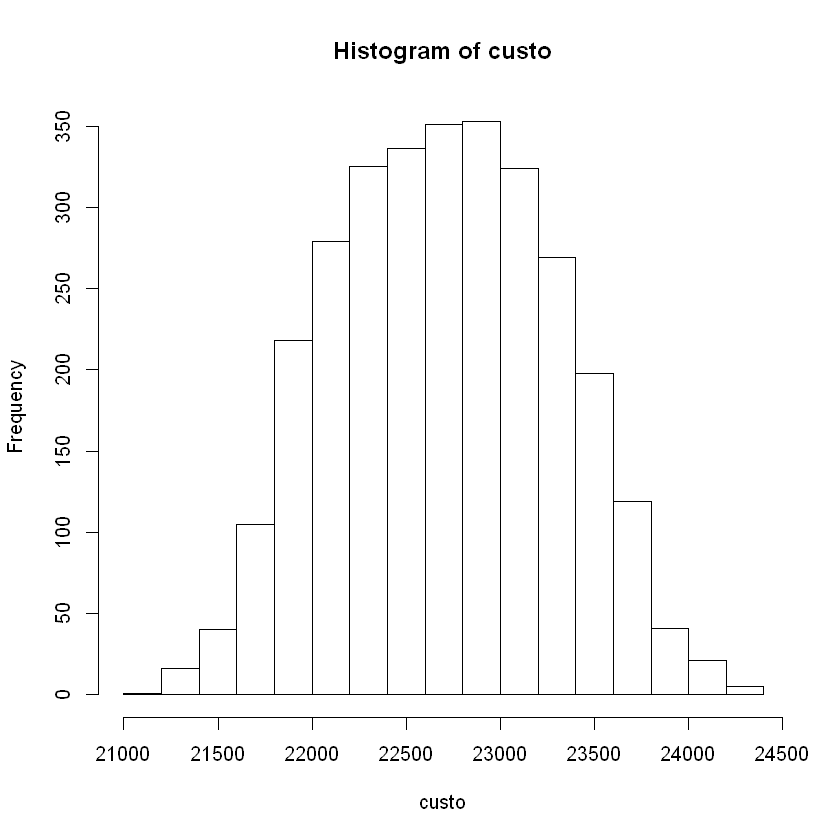

In [27]:
custo <- c()
for (i in 1:1000){
    for (j in c(40,41,42)){
        exec <- rtriangle(j,16,22,18)
        almoco <- rtriangle(j,25,36,28)
        custo <- c(custo_t,sum(exec * almoco))
    }
}

round(mean(custo),2)
hist(custo)

4) Um conhecido Chefe de cozinha deseja avaliar o retorno de investimento de seu novo restaurante no Rio de Janeiro. Através de consulta a alguns especialistas locais, ele ficou convencido que um conjunto de cliente típicos (2 pessoas para jantar ou almoçar) deve gastar cerca de 130,00 reais por visita ao restaurante. 

Entretanto, é importante mencionar que alguns poucos casais podem vir a escolher um subconjunto dos pratos mais baratos, reduzindo este gasto para um mínimo de 90,00 reais. No caso de conjuntos de 4 clientes, que ocorre com uma certa frequência, o gasto máximo por visita ao restaurante poderia chegar até 250,00 reais. Embora seja possível que o restaurante venha a receber visitas de conjuntos de 6 ou mais pessoas, a experiência mostra que estas situações são muito raras, causando um impacto muito pequeno no faturamento total.


O Chefe calcula que seu restaurante no Rio de Janeiro, em regime, receba a visita diária de pelo menos 40 grupos de pessoas. Em dias atípicos a frequência pode chegar a até 120 grupos, sendo 60 o número mais provável. 

Outra informação relevante fornecida pelos especialistas é que se deve esperar um lucro entre 15% e 30% do faturamento de cada mesa, sendo que cerca de 22% é o valor mais provável.

O Chefe quer que vc calcule o risco do valor presente do lucro total do restaurante durante o primeiro ano de operação. Assuma que: todos os meses do ano possuem 30 dias úteis e que os valores serão descontados mensalmente pela taxa Selic.

[1] 736403.4

[1] 13612.86

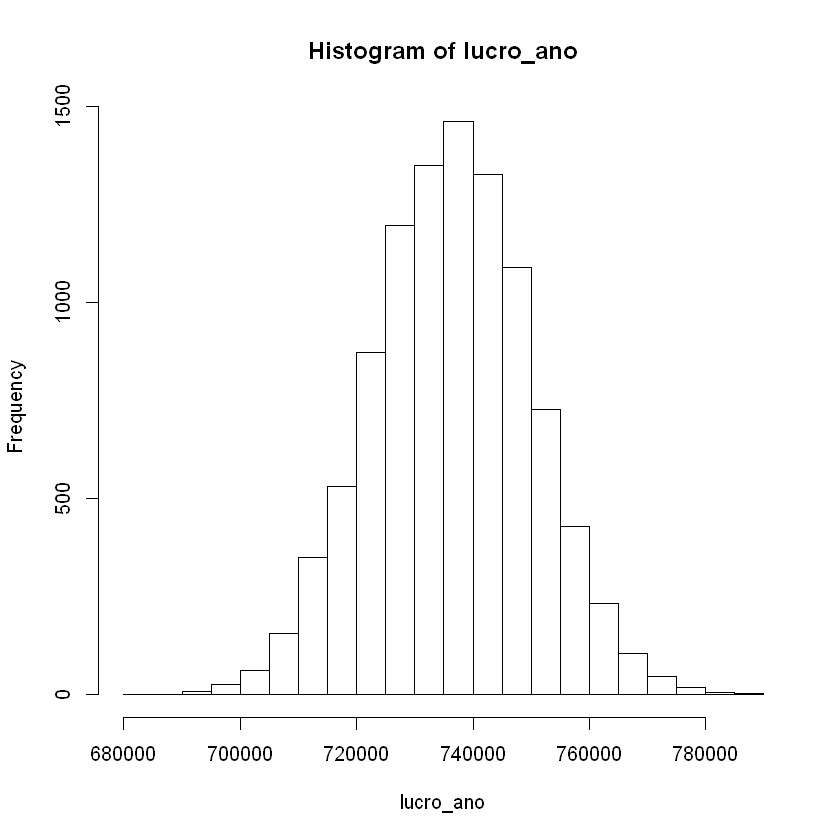

In [44]:
lucro_ano <- c()
for (i in 1:10000){
    lucro <- c()
    for (mes in 1:12){
        por_mesa = rtriangle(30,90,250,130)
        grupos <- rtriangle(30,40,120,60)
        fat_mesa <- por_mesa * grupos
        lucro_mes <- sum(rtriangle(30,.15,.30,.22) * fat_mesa)
        lucro <- c(lucro,lucro_mes / ((1 + .065/12)^j))
    }
    lucro_ano <- c(lucro_ano,sum(lucro))
}
mean(lucro_ano)
sd(lucro_ano)
hist(lucro_ano)